In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from zipfile import ZipFile

with ZipFile('/content/drive/MyDrive/Colab Notebooks/Treevill.zip', 'r') as zipobj:
    zipobj.extractall('Treevill')


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [ ]:
#count number of inmages inthe respective classes 0 - Brain Tumor and 1 - Healthy
ROOT_DIR = '/content/Treevill/Treevill/rawdata'
number_of_folder = {}

for dir in os.listdir(ROOT_DIR):
  number_of_folder[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

number_of_folder.items()

dict_items([('The Poonspar Tree', 1800), ('Koinar', 1800), ('Camphor Tree', 1800), ('Debdaeu', 1800), ('Ashok', 1800), ('Raktan', 1800), ('Belati gab', 1800), ('Udaya padda', 1800), ('Hairy Sterculia', 1800), ('Karanja', 1800), ('Aloe Wood', 1800), ('Piliostigma', 1800), ('Avocado', 1800), ('Bahera', 1800), ('Crown Gardenia', 1800), ('Kamala Tree', 1800), ('Mastwood', 1800), ('Loha kat', 1800), ('Khejur', 1800), ('Bamboo', 1800), ('Marking Nut tree', 1800), ('Guava', 1800), ('Makri-shal', 1800), ('Holudkrishnachura', 1800), ('Bazna', 1800), ('Mango', 1800), ('Australian Pine', 1800), ('Chaplash', 1800), ('Prickly Tree', 1800), ('Corkwood', 1800), ('India Red Pear', 1800), ('Palm', 1800), ('East Indian copaiba balsam', 1800), ('Banana', 1800), ('Haritaki', 1800), ('Nageshore', 1800), ('Ashore', 1800), ('Bishop wood', 1800), ('Egyptian lotus', 1800), ('Karen Wood', 1800), ('Golden Shower Tree', 1800), ('Haldu', 1800), ('Teak', 1800), ('Shail Vadi', 1800), ('Blue Bellvine', 1800), ('Civit

In [ ]:
def dataFolder(p, split, number_of_images):
  if not os.path.exists("./" + p):
    os.mkdir("./" + p)
    print(f"{p} folder created.")
  else:
    print(f"{p} folder already exists.")

  for dir in os.listdir(ROOT_DIR):
    os.makedirs(f"./{p}/{dir}", exist_ok=True)

    img_list = os.listdir(os.path.join(ROOT_DIR, dir))
    sample_size = math.floor(split * number_of_images[dir]) - 5  # << using original count

    if sample_size > 0 and sample_size <= len(img_list):
      selected_imgs = np.random.choice(img_list, size=sample_size, replace=False)
      for img in selected_imgs:
        O = os.path.join(ROOT_DIR, dir, img)
        D = os.path.join("./" + p, dir)
        shutil.copy(O, D)
        os.remove(O)
    else:
      print(f"Skipping {dir}: Not enough images to sample {sample_size}.")

In [ ]:
dataFolder('train', 0.7, number_of_folder)

train folder created.


In [ ]:
dataFolder('test', 0.15, number_of_folder)

test folder created.


In [ ]:
dataFolder('validation', 0.15, number_of_folder)

validation folder created.


In [ ]:
#count number of inmages inthe respective classes 0 - Brain Tumor and 1 - Healthy
ROOT_DIR = '/content/Treevill/Treevill/rawdata'
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

number_of_images.items()

dict_items([('The Poonspar Tree', 15), ('Koinar', 15), ('Camphor Tree', 15), ('Debdaeu', 15), ('Ashok', 15), ('Raktan', 15), ('Belati gab', 15), ('Udaya padda', 15), ('Hairy Sterculia', 15), ('Karanja', 15), ('Aloe Wood', 15), ('Piliostigma', 15), ('Avocado', 15), ('Bahera', 15), ('Crown Gardenia', 15), ('Kamala Tree', 15), ('Mastwood', 15), ('Loha kat', 15), ('Khejur', 15), ('Bamboo', 15), ('Marking Nut tree', 15), ('Guava', 15), ('Makri-shal', 15), ('Holudkrishnachura', 15), ('Bazna', 15), ('Mango', 15), ('Australian Pine', 15), ('Chaplash', 15), ('Prickly Tree', 15), ('Corkwood', 15), ('India Red Pear', 15), ('Palm', 15), ('East Indian copaiba balsam', 15), ('Banana', 15), ('Haritaki', 15), ('Nageshore', 15), ('Ashore', 15), ('Bishop wood', 15), ('Egyptian lotus', 15), ('Karen Wood', 15), ('Golden Shower Tree', 15), ('Haldu', 15), ('Teak', 15), ('Shail Vadi', 15), ('Blue Bellvine', 15), ('Civit', 15), ('Roskau', 15), ('Maxican lilac', 15), ('Mouskanda', 15), ('Cannonball Tree', 15),

# Model

In [ ]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras

In [ ]:
# CNN Model

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(224,224,3)))

model.add(Conv2D(filters=36, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=66, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=66, activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 36)   │         5,220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 36)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 64)   │        20,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 66)             │     5,710,914 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 66)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 66)             │         4,422 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,815,660 (22.18 MB)

 Trainable params: 5,815,660 (22.18 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
def preprocessingImagesfortrain(path):
  """
  input: path
  output: preprocessed images
  """

  image_data = ImageDataGenerator(zoom_range=0.2, shear_range=0.2, rescale=1/255, horizontal_flip=True)  # data augmentation
  image = image_data.flow_from_directory(directory=path, target_size=(224,224), batch_size=32, class_mode='categorical')

  return image

In [ ]:
def preprocessingImagesforval(path):
  """
  input: path
  output: preprocessed images
  """

  image_data = ImageDataGenerator(rescale=1/255)
  image = image_data.flow_from_directory(directory=path, target_size=(224,224), batch_size=32, class_mode='categorical')

  return image

In [ ]:
path = "/content/train"
train_data = preprocessingImagesfortrain(path)

Found 82830 images belonging to 66 classes.


In [ ]:
val_data = preprocessingImagesforval('/content/validation')

Found 17490 images belonging to 66 classes.


In [ ]:
test_data = preprocessingImagesforval('/content/test')

Found 17490 images belonging to 66 classes.


In [ ]:
# EARLY stopping and model check point

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience=6, verbose=1, mode='auto')

# model check point
mc = ModelCheckpoint(monitor="val_accuracy", filepath="./bestmodel.h5", verbose=1, save_best_only=True, mode='auto')

cd = [es, mc]

In [ ]:
hs = model.fit(x=train_data,
                         steps_per_epoch=train_data.samples,
                         epochs=1,
                         verbose=1,
                         validation_data=val_data,
                         validation_steps=val_data.samples,
                         callbacks=cd)

 2589/82830 ━━━━━━━━━━━━━━━━━━━━ 8:41:00 390ms/step - accuracy: 0.5910 - loss: 1.6324
Epoch 1: val_accuracy improved from -inf to 0.98891, saving model to ./bestmodel.h5


82830/82830 ━━━━━━━━━━━━━━━━━━━━ 1062s 13ms/step - accuracy: 0.7960 - loss: 0.7694 - val_accuracy: 0.9889 - val_loss: 0.0215


In [ ]:
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from tqdm import tqdm

# Directory where all tree class folders exist
root_dir = "/content/Treevill/Treevill/rawdata"

# Load label mappings
class_indices = train_data.class_indices  # from ImageDataGenerator
idx_to_class = {v: k for k, v in class_indices.items()}

# Store predictions
results = []

# Loop through all class folders (e.g., Akashmoni, Mango, etc.)
for class_name in sorted(os.listdir(root_dir)):
    class_dir = os.path.join(root_dir, class_name)

    if not os.path.isdir(class_dir):
        continue  # skip non-folder items

    # Loop through images in class folder
    for image_file in sorted(os.listdir(class_dir)):
        image_path = os.path.join(class_dir, image_file)

        try:
            # Load and preprocess image
            img = load_img(image_path, target_size=(224, 224))
            input_arr = img_to_array(img) / 255.0
            input_arr = np.expand_dims(input_arr, axis=0)

            # Predict
            preds = model.predict(input_arr)[0]
            pred_class = np.argmax(preds)
            pred_label = idx_to_class[pred_class]

            # Save prediction
            results.append({
                "image_id": f"{class_name}/{image_file}",
                "predicted_label": pred_label
            })

        except Exception as e:
            print(f"Error processing {image_path}: {e}")

# Save to CSV
df = pd.DataFrame(results)
df.to_csv("all_tree_predictions.csv", index=False)

print("✅ CSV saved as 'all_tree_predictions.csv'")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━

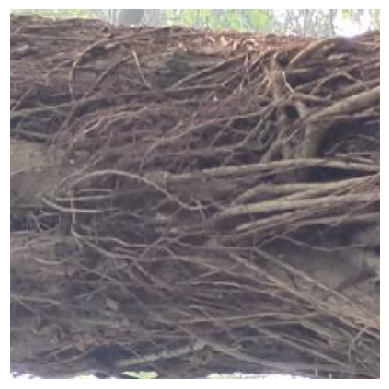

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
🌳 The predicted tree type is: **Akashmoni**


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the image
path = "/content/train/Akashmoni/1.jpg"

img = load_img(path, target_size=(224, 224))
input_arr = img_to_array(img) / 255.0  # Normalize the image
plt.imshow(input_arr)
plt.axis('off')
plt.show()

# Reshape for model input
input_arr = np.expand_dims(input_arr, axis=0)

# Predict
pred_probs = model.predict(input_arr)[0]  # shape: (66,)
pred_class_index = np.argmax(pred_probs)  # get the index of highest probability

# Class mapping from ImageDataGenerator
class_indices = train_data.class_indices  # e.g., {'Akashmoni': 0, 'Mango': 1, ...}
labels = list(class_indices.keys())
predicted_tree = labels[pred_class_index]

# Show result
print(f"🌳 The predicted tree type is: **{predicted_tree}**")
